## 1. Key conceptions in Maximum Leaf Spanning Tree
### 1.1. terminologies

<p style="color: yellow; font-weight: bold; text-shadow: -1px -1px 0 #000, 1px -1px 0 #000, -1px 1px 0 #000, 1px 1px 0 #000;">T -  a tree in G(includes edges and I, B, L)</p>
<p style="color: yellow; font-weight: bold; text-shadow: -1px -1px 0 #000, 1px -1px 0 #000, -1px 1px 0 #000, 1px 1px 0 #000;">I - the internal vertices of T, with r∈I</p>
<p style="color: red;">B - a subset of the leaves of T where T may be extended: the boundary set</p>
<p style="color: green;">L - the remaining leaves of T</p>
<p style="color: black;">X - the external vertices V\V(T)</p>
Here is a simple exmple of them:

In [ ]:
G_instruction_example = Graph([(1, 2), (1, 3), (2, 4), (4, 5), (4, 6), (3, 7), (3, 8), (2, 9), (9, 10)])
T = Graph([(1, 2), (1, 3), (2, 4), (3, 7), (3, 8), (2, 9)])
I = {1, 2, 3}
L = {7, 8}
B = {4, 9}
X = {5, 6, 10}
# vertex colors
vertex_colors = {'green': list(L), 'red': list(B), 'white': list(X), 'yellow': list(I)}

# edge_colors
edge_colors = {'yellow': T.edges(labels=False)}
G_instruction_example.show(vertex_colors=vertex_colors, edge_colors=edge_colors, layout='tree', tree_root=1, tree_orientation="down")

### 1.2. Lemmas

#### 1.2.1. Branching Lemma
Suppose u ∈ B and there exists a k-leaf tree T' extending T where u is an internal vertex.
Then, there exists a k-leaf tree T' extending (V(T)∪N_G(u),E(T)∪{uv:v∈N_G(u)∩X}).

For example, if we choose node 4 in Graph above, here is result after execute the branching lemma.

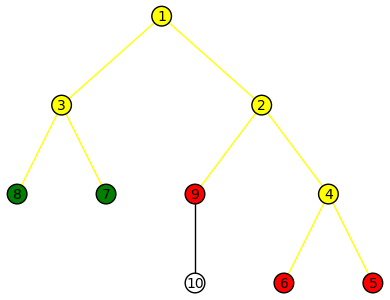

In [18]:
T = Graph([(1, 2), (1, 3), (2, 4), (3, 7), (3, 8), (2, 9), (4, 6), (4, 5)])
I = {1, 2, 3, 4}
L = {7, 8}
B = {5, 6, 9}
X = {10}
# vertex colors
vertex_colors = {'green': list(L), 'red': list(B), 'white': list(X), 'yellow': list(I)}

# edge_colors
edge_colors = {'yellow': T.edges(labels=False)}
G_instruction_example.show(vertex_colors=vertex_colors, edge_colors=edge_colors, layout='tree', tree_root=1, tree_orientation="down")

#### 1.2.2. Non-extendable simplification rule

If exists v ∈ B with N_G(v) ∩ X = Ø, then move v to L.

For example, if we apply this simplification rule to the graph above, here is result.

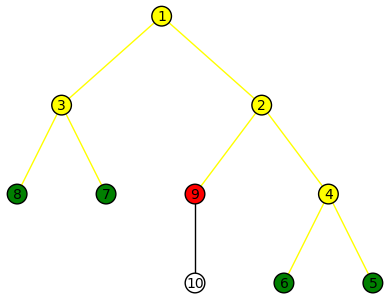

In [19]:
T = Graph([(1, 2), (1, 3), (2, 4), (3, 7), (3, 8), (2, 9), (4, 6), (4, 5)])
I = {1, 2, 3, 4}
L = {5, 6, 7, 8}
B = {9}
X = {10}
# vertex colors
vertex_colors = {'green': list(L), 'red': list(B), 'white': list(X), 'yellow': list(I)}

# edge_colors
edge_colors = {'yellow': T.edges(labels=False)}
G_instruction_example.show(vertex_colors=vertex_colors, edge_colors=edge_colors, layout='tree', tree_root=1, tree_orientation="down")

#### 1.2.3. Follow Path Lemma
Suppose u ∈ B and |N_G(u)∩X| = 1. Let N_G(u)∩X = {v}.
If there exists a k-leaf tree extending T where u is internal, but no k-leaf tree extending T where u is a leaf, then there exists a k-leaf tree extending T where both u and v are internal.

Here is simple exmple of use of Follow Path Lemma:

In [1]:
import copy
G_instruction_example = Graph([(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (7, 9)])
steps_instruction_example = []
#initial state
u = 1
T = Graph()
T.add_vertex(u)
I = set()
L = set()
B = {u}
X = set(G_instruction_example.vertices()) - {u}
neighbors_X = set(G_instruction_example.neighbors(u)) & X
#Follow Path Lemma
while len(neighbors_X) == 1:
    v = neighbors_X.pop()
    X.remove(v)
    T.add_edge(u, v)
    neighbors_X = set(G_instruction_example.neighbors(v)) & X
    u = v  # update v as new u(current vertex)
    if len(neighbors_X) == 1:
        I.add(u)
    elif len(neighbors_X) != 1:
        B.add(u)
    steps_instruction_example.append([copy.deepcopy(T), copy.deepcopy(I), copy.deepcopy(B), copy.deepcopy(L), copy.deepcopy(X), 5])
@interact
def show_step(step=slider(0, len(steps_instruction_example)-1, 1, label="Step")):
    T, I, B, L, X, operation_type = steps_instruction_example[step]
    # vertex colors
    vertex_colors = {'green': list(L), 'red': list(B), 'white': list(X), 'yellow': list(I)}

    # edge_colors
    edge_colors = {'yellow': T.edges(labels=False)}
    
    # plot graph
    G_instruction_example_plot = G_instruction_example.plot(vertex_colors=vertex_colors, edge_colors=edge_colors, layout='circular')
    
    show(G_instruction_example_plot)

Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


## 2. Branching algorithm for maximum leaf spanning tree

In [35]:
steps = []
def extend_tree(G, k, T, I, B, L, X, recall):
    #record all steps
    recall = 0
    
    # Halt - yes
    if len(L) + len(B) >= k:
        return True
    
    # Halt - No
    if len(B) == 0:
        steps[-1][5] += 1
        return False
    
    # Simplication rule：If exist v∈B with N_G(v) ∩ X = 0, then move v to L
    B_to_L = {v for v in B if not set(G.neighbors(v)) & X}
    for v in B_to_L:
        B.remove(v)
        L.add(v)
        steps.append([copy.deepcopy(T), copy.deepcopy(I), copy.deepcopy(B), copy.deepcopy(L), copy.deepcopy(X), copy.deepcopy(recall), 2])

    #Select u from B
    for u in list(B):
        
        # branch 1: try to move a vertex from B to L
        B.remove(u)
        L.add(u)  
        steps.append([copy.deepcopy(T), copy.deepcopy(I), copy.deepcopy(B), copy.deepcopy(L), copy.deepcopy(X), copy.deepcopy(recall), 3])
        if extend_tree(G, k, T, I, B, L, X, recall):
            return True
        # recall branch 1
        L.remove(u)
        B.add(u)
        steps.append([copy.deepcopy(T), copy.deepcopy(I), copy.deepcopy(B), copy.deepcopy(L), copy.deepcopy(X), copy.deepcopy(recall), 4])

        # branch 2: handle u as a internal vertex (Branching Lemma)
        original_u = u  # save the original vertex
        added_edges = []  # save added edges
        B.remove(u)
        I.add(u)
        neighbors_X = set(G.neighbors(u)) & X
        
        #Follow Path Lemma
        while len(neighbors_X) == 1:
            v = neighbors_X.pop()
            X.remove(v)
            T.add_edge(u, v)
            added_edges.append((u, v))
            neighbors_X = set(G.neighbors(v)) & X
            u = v  # update v as new u(current vertex)
            if len(neighbors_X) == 1:
                I.add(u)
            elif len(neighbors_X) != 1:
                B.add(u)
            steps.append([copy.deepcopy(T), copy.deepcopy(I), copy.deepcopy(B), copy.deepcopy(L), copy.deepcopy(X), copy.deepcopy(recall), 5])
        
        B.discard(u)
        # process branch 2
        for v in neighbors_X:
            T.add_edge(u, v)
            added_edges.append((u, v))
            B.add(v)
            X.remove(v)
            steps.append([copy.deepcopy(T), copy.deepcopy(I), copy.deepcopy(B), copy.deepcopy(L), copy.deepcopy(X), copy.deepcopy(recall), 6])
    
        if extend_tree(G, k, T, I, B, L, X, recall):
            return True
    
        # recall branch 2
        for u, v in added_edges:
            T.delete_edge((u, v))  # delete added edges
            I.discard(v)
            X.add(v)
        I.discard(original_u)  # remove original u
        B.add(original_u)  # add original u to B
        X.update(neighbors_X)  # update unused vertices to X
        for v in neighbors_X:
            B.discard(v)  # remove vertices from B
        steps.append([copy.deepcopy(T), copy.deepcopy(I), copy.deepcopy(B), copy.deepcopy(L), copy.deepcopy(X), copy.deepcopy(recall), 7])
    steps[-1][5] += 1
    return False

def max_leaf_spanning_tree(G, k):
    T = Graph()
    I = set()
    L = set()
    B = set()
    X = set(G.vertices())
    recall = 0
    # save initial state
    for r in G.vertices():
        steps.append([Graph(), set(), set(), set(), set(G.vertices()), 0, 8])
        T = Graph() #a tree in G
        T.add_vertex(r) #add initial vertex to T
        I = set()  # the internal vertices of T, with r∈I
        L = set()  # the remaining leaves of T
        B = {r}  # a subset of the leaves of T where T may be extended: the boundary set
        X = set(G.vertices()) - {r}  # the external vertices V\V(T)
        steps.append([copy.deepcopy(T), copy.deepcopy(I), copy.deepcopy(B), copy.deepcopy(L), copy.deepcopy(X), copy.deepcopy(recall), 1])
        if extend_tree(G, k, T, I, B, L, X, recall):
            return True, T
    return False, None


In [36]:
# use example
G = Graph([('a', 'b'), ('b', 'c'), ('c', 'a'), ('c', 'd'), ('d', 'e')])  
k = 3  # target least number of leaves
result, T = max_leaf_spanning_tree(G, k)
if result:
    print("Exist a spanning tree with maximum leaf number of {}.".format(k))
else:
    print("Not Exist a spanning tree with maximum leaf number of {}.".format(k))

Exist a spanning tree with maximum leaf number of 3.


## 3. Algorithm demonstration

In [38]:
@interact
def show_step(step=slider(0, len(steps)-1, 1, label="Step")):
    T, I, B, L, X, recall, operation_type = steps[step]
    # vertex colors
    vertex_colors = {'green': list(L), 'red': list(B), 'white': list(X), 'yellow': list(I)}

    # edge_colors
    edge_colors = {'yellow': T.edges(labels=False)}
    
    # plot graph
    G_plot = G.plot(vertex_colors=vertex_colors, edge_colors=edge_colors, layout='circular')
    
    # show current steps of algorithm
    
    print("The current tree T are represented in yellow, the nodes in B are in red, the nodes in L are in green,")
    print(" and the remaining unchanged parts(X) set to white.\n")
    print(f"Current state: I:{I if I else ' Null'}, B:{B if B else ' Null'}, L:{L if L else ' Null'}, X:{X if X else ' Null'}, k:{k}\n")
    
    # operation explanation
    if operation_type == 1:
        print(f"This state we choose a new vertex as a start vertex.\n")
    elif operation_type == 2:
        print(f"Simplication rule：If exist v∈B with N_G(v) ∩ X = 0, then move v to L.")
        print(f"This means all vertices in B that can not be expanded will be moved to L.\n")
    elif operation_type == 3:
        print(f"This step we go to branch 1: try to move a vertex from B to L.\n")
    elif operation_type == 4:
        print(f"Recall the branch 1 operation: move the vertex back to B.\n")
    elif operation_type == 5:
        print(f"This step will process follow path lemma.\n")
    elif operation_type == 6:
        print(f"This step we go to branch 2: handle current vertex u as a internal vertex (Branching Lemma).")
        print(f"Then, put all vertices adjacent to the current vertex u and not yet processed into set B.\n")
    elif operation_type == 7:
        print(f"Recall the branch 2 operation: Branching Lemma.\n")
    elif operation_type == 8:
        print(f"This step is initial state of the graph.\n")
    
    # recall info
    if recall == 1:
        print(f"This branch has no more leaves that may be extended, this state will recall {recall} step.\n")
    elif recall == 3:
        print(f"This initial vertex is not available, the state will recall to initial graph and choose a new initial vertex.\n")
    
    #result
    if step == len(steps)-1:
        if result:
            print(f"The number of sum of vertices in B and vertices in L has reached k:{k}.")
            print(f"YES. The branching algorithm find a maximum leaf spanning tree with at least {k} leaves.\n")
        else:
            print(f"The branching algorithm has test all viable tree, but can't reach k:{k}.")
            print(f"NO. The branching algorithm find out there is no maximum leaf spanning tree in G.\n")
    show(G_plot)

Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.
